In [ ]:
# Code to read csv file into colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials


In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
downloaded = drive.CreateFile({'id':'1wet0w6Nzry11GhiaXxPcv48SX7LN0dkm'}) # replace the id with id of file you want to access
downloaded.GetContentFile('survey_results_public.csv')

Data Cleaning and Preprocessing Approaches

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("survey_results_public.csv")
df

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,...,NaN,NaN,No,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat less welcome now than last year,40.0,7,4
4,5,"I used to be a developer by profession, but no...",Yes,31.0,16,NaN,NaN,NaN,United States,NaN,...,Easy,Too short,No,"Computer science, computer engineering, or sof...",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,NaN,15,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,64858,NaN,Yes,NaN,16,NaN,NaN,NaN,United States,NaN,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,NaN,NaN,10,Less than 1 year
64457,64867,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Morocco,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64458,64898,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Viet Nam,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64459,64925,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Poland,NaN,...,NaN,NaN,NaN,NaN,Angular;Angular.js;React.js,NaN,NaN,NaN,NaN,NaN


In [ ]:
df=df.rename({"WorkWeekHrs":"WorkingTime"},axis=1)

In [ ]:
df = df[["Country", "EdLevel", "YearsCodePro", "Employment", "ConvertedComp","WorkingTime"]]
df = df.rename({"ConvertedComp": "Salary"}, axis=1)
df

,Country,EdLevel,YearsCodePro,Employment,Salary,WorkingTime
0,Germany,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",27,"Independent contractor, freelancer, or self-em...",NaN,50.0
1,United Kingdom,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",4,Employed full-time,NaN,NaN
2,Russian Federation,NaN,NaN,NaN,NaN,NaN
3,Albania,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",4,NaN,NaN,40.0
4,United States,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",8,Employed full-time,NaN,NaN
...,...,...,...,...,...,...
64456,United States,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Less than 1 year,Employed full-time,NaN,NaN
64457,Morocco,NaN,NaN,Employed full-time,NaN,NaN
64458,Viet Nam,Primary/elementary school,NaN,NaN,NaN,NaN
64459,Poland,NaN,NaN,Employed full-time,NaN,NaN


In [ ]:
df = df[df["Salary"].notnull()]
df

,Country,EdLevel,YearsCodePro,Employment,Salary,WorkingTime
7,United States,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",13,Employed full-time,116000.0,39.0
9,United Kingdom,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",4,Employed full-time,32315.0,36.0
10,United Kingdom,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",2,Employed full-time,40070.0,40.0
11,Spain,Some college/university study without earning ...,7,Employed full-time,14268.0,40.0
12,Netherlands,"Secondary school (e.g. American high school, G...",20,Employed full-time,38916.0,36.0
...,...,...,...,...,...,...
64142,Nigeria,"Secondary school (e.g. American high school, G...",2,Employed part-time,984.0,4.0
64148,Colombia,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",5,Employed full-time,19428.0,40.0
64152,United States,Some college/university study without earning ...,20,Employed full-time,200.0,NaN
64153,Chile,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",3,Employed full-time,15048.0,45.0


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34756 entries, 7 to 64154
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       34756 non-null  object 
 1   EdLevel       34188 non-null  object 
 2   YearsCodePro  34621 non-null  object 
 3   Employment    34717 non-null  object 
 4   Salary        34756 non-null  float64
 5   WorkingTime   33658 non-null  float64
dtypes: float64(2), object(4)
memory usage: 1.9+ MB
None


In [ ]:
df = df.dropna()
df.isnull().sum()
df

,Country,EdLevel,YearsCodePro,Employment,Salary,WorkingTime
7,United States,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",13,Employed full-time,116000.0,39.0
9,United Kingdom,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",4,Employed full-time,32315.0,36.0
10,United Kingdom,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",2,Employed full-time,40070.0,40.0
11,Spain,Some college/university study without earning ...,7,Employed full-time,14268.0,40.0
12,Netherlands,"Secondary school (e.g. American high school, G...",20,Employed full-time,38916.0,36.0
...,...,...,...,...,...,...
64141,Germany,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",9,"Independent contractor, freelancer, or self-em...",129718.0,35.0
64142,Nigeria,"Secondary school (e.g. American high school, G...",2,Employed part-time,984.0,4.0
64148,Colombia,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",5,Employed full-time,19428.0,40.0
64153,Chile,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",3,Employed full-time,15048.0,45.0


In [ ]:
df = df[df["Employment"] == "Employed full-time"]
df = df.drop("Employment", axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29136 entries, 7 to 64154
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       29136 non-null  object 
 1   EdLevel       29136 non-null  object 
 2   YearsCodePro  29136 non-null  object 
 3   Salary        29136 non-null  float64
 4   WorkingTime   29136 non-null  float64
dtypes: float64(2), object(3)
memory usage: 1.3+ MB


In [ ]:
print(df['Country'].value_counts())

United States     7367
India             2289
United Kingdom    2245
Germany           1870
Canada            1148
                  ... 
Turkmenistan         1
Bahamas              1
Benin                1
Namibia              1
Andorra              1
Name: Country, Length: 152, dtype: int64


In [ ]:
def shorten_categories(categories, cutoff):
    categorical_map = {}
    for i in range(len(categories)):
        if categories.values[i] >= cutoff:
            categorical_map[categories.index[i]] = categories.index[i]
        else:
            categorical_map[categories.index[i]] = 'Other'
    return categorical_map

In [ ]:
country_map = shorten_categories(df.Country.value_counts(), 400)
df['Country'] = df['Country'].map(country_map)
print(df.Country.value_counts())

Other                 8251
United States         7367
India                 2289
United Kingdom        2245
Germany               1870
Canada                1148
Brazil                 972
France                 958
Spain                  651
Netherlands            640
Australia              638
Poland                 557
Italy                  549
Russian Federation     505
Sweden                 496
Name: Country, dtype: int64


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


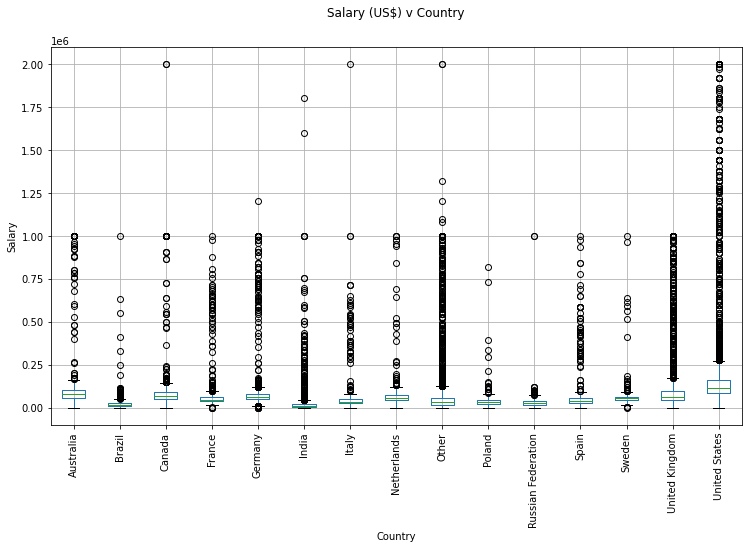

None


In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(12, 7))
df.boxplot('Salary', 'Country', ax=ax)
plt.suptitle('Salary (US$) v Country')
plt.title('')
plt.ylabel('Salary')
plt.xticks(rotation=90)
print(plt.show())

In [ ]:
df = df[df["Salary"] <= 250000]
df = df[df["Salary"] >= 10000]
df = df[df['Country'] != 'Other']

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


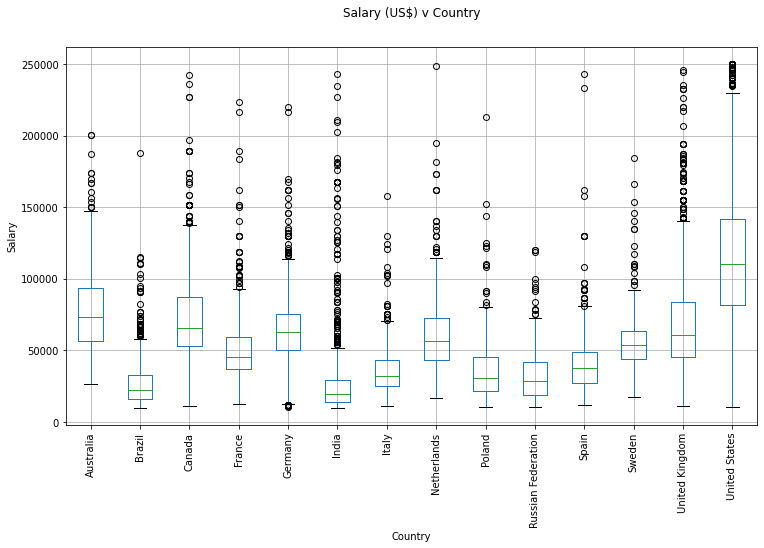

None


In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(12, 7))
df.boxplot('Salary', 'Country', ax=ax)
plt.suptitle('Salary (US$) v Country')
plt.title('')
plt.ylabel('Salary')
plt.xticks(rotation=90)
print(plt.show())

In [ ]:
print(df["YearsCodePro"].unique())

['13' '4' '2' '7' '20' '1' '3' '10' '12' '29' '6' '28' '8' '23' '15' '25'
 '9' '11' 'Less than 1 year' '5' '16' '18' '14' '32' '19' '22' '38' '21'
 '30' '26' '27' '17' '24' '34' '35' '33' '36' '40' '39'
 'More than 50 years' '31' '37' '41' '45' '42' '44' '43' '50' '49']


In [ ]:
def clean_experience(x):
    if x == 'More than 50 years':
        return 50
    if x == 'Less than 1 year':
        return 0.5
    return float(x)

In [ ]:
df['YearsCodePro'] = df['YearsCodePro'].apply(clean_experience)

In [ ]:
print(df["EdLevel"].unique())

['Bachelor’s degree (B.A., B.S., B.Eng., etc.)'
 'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)'
 'Some college/university study without earning a degree'
 'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)'
 'Associate degree (A.A., A.S., etc.)'
 'Professional degree (JD, MD, etc.)'
 'Other doctoral degree (Ph.D., Ed.D., etc.)'
 'I never completed any formal education' 'Primary/elementary school']


In [ ]:
def clean_education(x):
    if 'Bachelor’s degree' in x:
        return 'Bachelor’s degree'
    if 'Master’s degree' in x:
        return 'Master’s degree'
    if 'Professional degree' in x or 'Other doctoral' in x:
        return 'Post grad'
    return 'Less than a Bachelors'

In [ ]:
df['EdLevel'] = df['EdLevel'].apply(clean_education)

In [ ]:
print(df["EdLevel"].unique())

['Bachelor’s degree' 'Master’s degree' 'Less than a Bachelors' 'Post grad']


In [ ]:
print(df["WorkingTime"].value_counts())

40.0     9683
45.0     1565
35.0     1166
50.0     1070
38.0      776
         ... 
39.5        1
126.0       1
51.0        1
376.0       1
47.5        1
Name: WorkingTime, Length: 102, dtype: int64


In [ ]:
df = df[df["WorkingTime"] <= 50]
df = df[df["WorkingTime"] >= 30]
df = df[df['WorkingTime'] != 'Other']

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le_education = LabelEncoder()
df['EdLevel'] = le_education.fit_transform(df['EdLevel'])
print(df["EdLevel"].unique())

[0 2 1 3]


In [ ]:
le_country = LabelEncoder()
df['Country'] = le_country.fit_transform(df['Country'])
print(df["Country"].unique())

[13 12 10  7  4  2  6  1  3  5 11  8  0  9]


In [ ]:
X = df.drop("Salary", axis=1)
Y = df["Salary"]
X

,Country,EdLevel,YearsCodePro,WorkingTime
7,13,0,13.0,39.0
9,12,2,4.0,36.0
10,12,0,2.0,40.0
11,10,1,7.0,40.0
12,7,1,20.0,36.0
...,...,...,...,...
64101,9,1,10.0,40.0
64113,13,1,15.0,50.0
64116,13,0,6.0,45.0
64122,13,1,4.0,40.0


Splitting Train and Test Data

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3, random_state=2)

In [ ]:
print(X.shape,X_train.shape,X_test.shape)

(16986, 4) (11890, 4) (5096, 4)


Linear Regression Algorithm

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
linear_reg = LinearRegression()
print(linear_reg.fit(X_train, Y_train))

LinearRegression()


In [ ]:
Y_pred_train = linear_reg.predict(X_train)

In [ ]:
linear_reg1 = LinearRegression()
print(linear_reg1.fit(X_test, Y_test))

LinearRegression()


In [ ]:
Y_pred_test = linear_reg1.predict(X_test)

Text(0.5, 1.0, 'Actual vs Predicted')

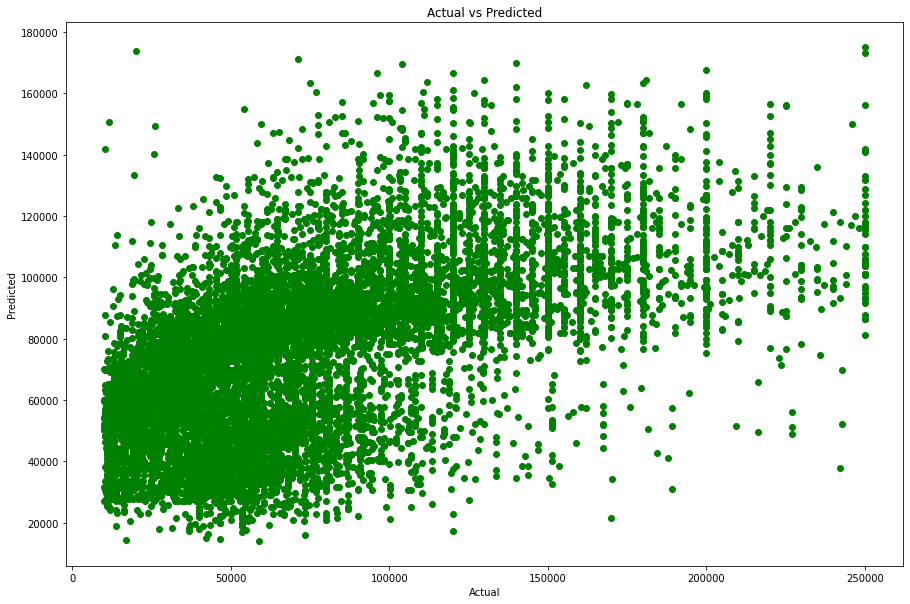

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
plt.scatter(Y_train,Y_pred_train, color='green')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')

Text(0.5, 1.0, 'Actual vs Predicted')

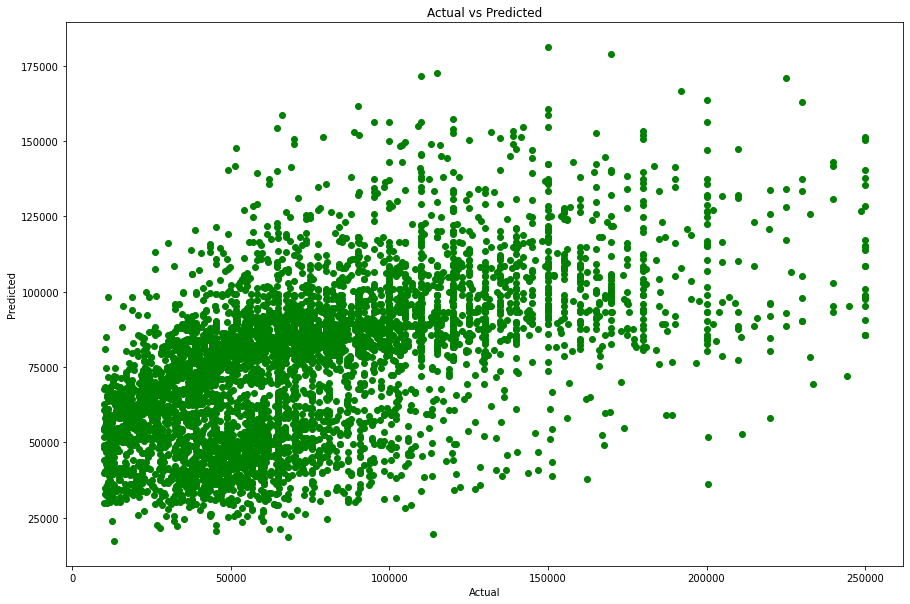

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
plt.scatter(Y_test,Y_pred_test, color='green')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')

Accuracy on train and test data using Linear Regression

In [ ]:
from sklearn.metrics import r2_score
r2_score(Y_train, Y_pred_train)

0.3309295555090621

In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np

In [ ]:
error = np.sqrt(mean_squared_error(Y_train, Y_pred_train))
print(error)

38552.76941404681


In [ ]:
from sklearn.metrics import r2_score
r2_score(Y_test, Y_pred_test)

0.3193410636437215

In [ ]:
error1 = np.sqrt(mean_squared_error(Y_test, Y_pred_test))
print(error1)

37789.97206534506


Decision Tree Regressor Algorithm

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
dec_tree_reg = DecisionTreeRegressor(random_state=0)
print(dec_tree_reg.fit(X_train, Y_train))

DecisionTreeRegressor(random_state=0)


In [ ]:
Y_pred_train = dec_tree_reg.predict(X_train)

In [ ]:
dec_tree_reg1 = DecisionTreeRegressor(random_state=0)
print(dec_tree_reg1.fit(X_test, Y_test))
Y_pred_test = dec_tree_reg1.predict(X_test)

DecisionTreeRegressor(random_state=0)


Text(0.5, 1.0, 'Actual vs Predicted')

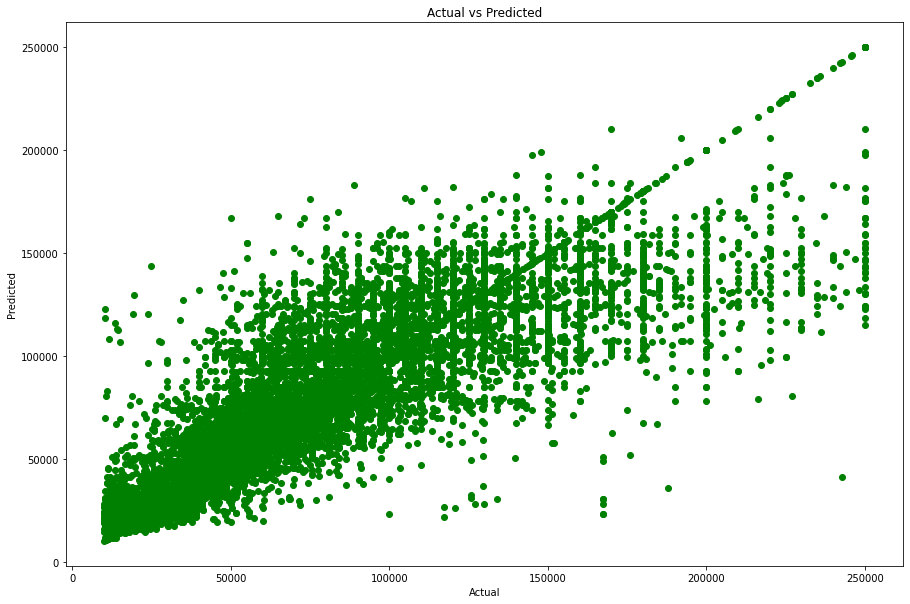

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
plt.scatter(Y_train,Y_pred_train, color='green')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')

Text(0.5, 1.0, 'Actual vs Predicted')

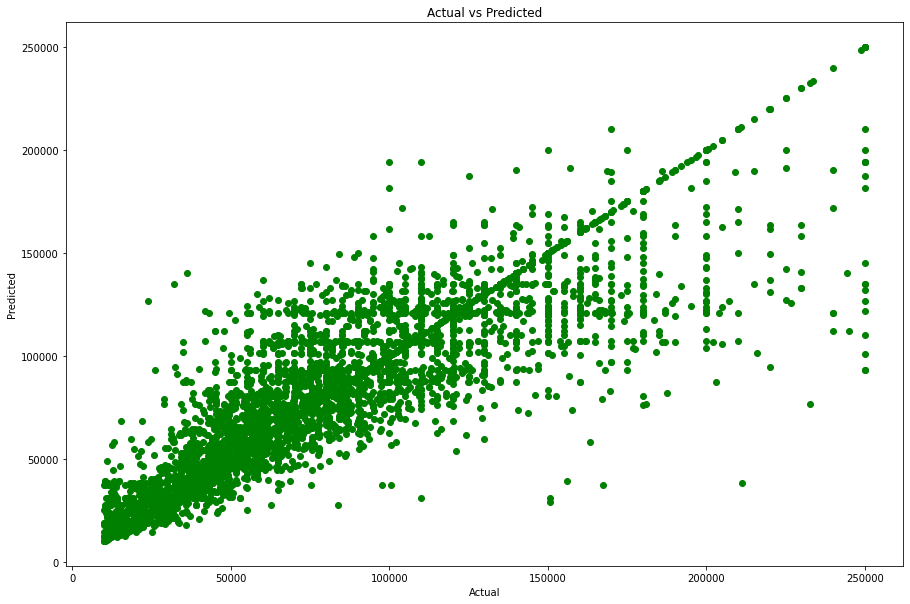

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
plt.scatter(Y_test,Y_pred_test, color='green')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')

Accuracy on train and test data using Decision Tree Regressor Algorithm

In [ ]:
from sklearn.metrics import r2_score
r2_score(Y_train, Y_pred_train)

0.7251172056470212

In [ ]:
error = np.sqrt(mean_squared_error(Y_train, Y_pred_train))
print("${:,.02f}".format(error))

$24,711.18


In [ ]:
from sklearn.metrics import r2_score
r2_score(Y_test, Y_pred_test)

0.7584894777940754

In [ ]:
error = np.sqrt(mean_squared_error(Y_test, Y_pred_test))
print("${:,.02f}".format(error))

$22,510.22


Random Forest Regressor Algorithm

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
random_forest_reg = RandomForestRegressor(random_state=0)
print(random_forest_reg.fit(X_train, Y_train))


RandomForestRegressor(random_state=0)


In [ ]:
Y_pred_train = random_forest_reg.predict(X_train)

In [ ]:
random_forest_reg1 = RandomForestRegressor(random_state=0)
print(random_forest_reg1.fit(X_test, Y_test))


RandomForestRegressor(random_state=0)


In [ ]:
Y_pred_test = random_forest_reg1.predict(X_test)

Text(0.5, 1.0, 'Actual vs Predicted')

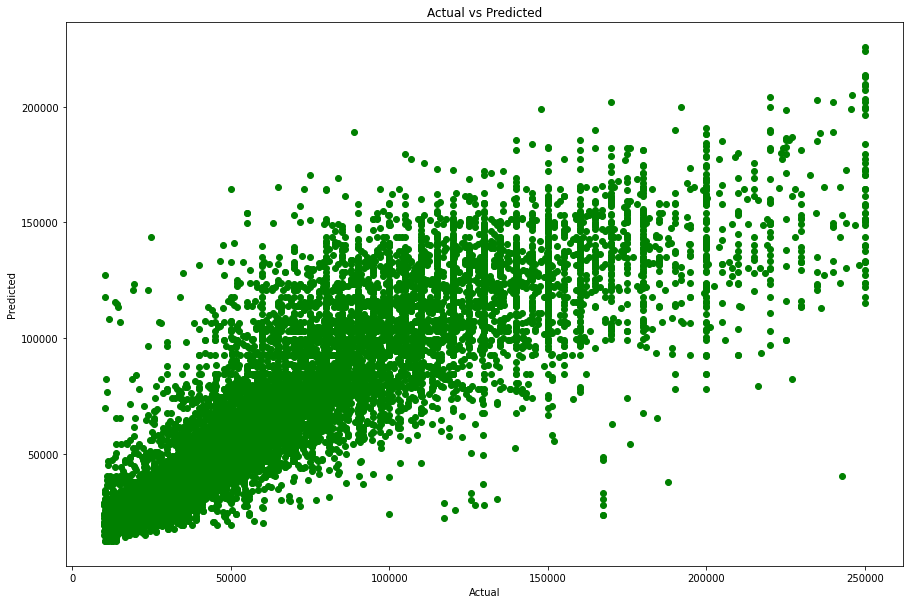

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
plt.scatter(Y_train,Y_pred_train, color='green')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')

Text(0.5, 1.0, 'Actual vs Predicted')

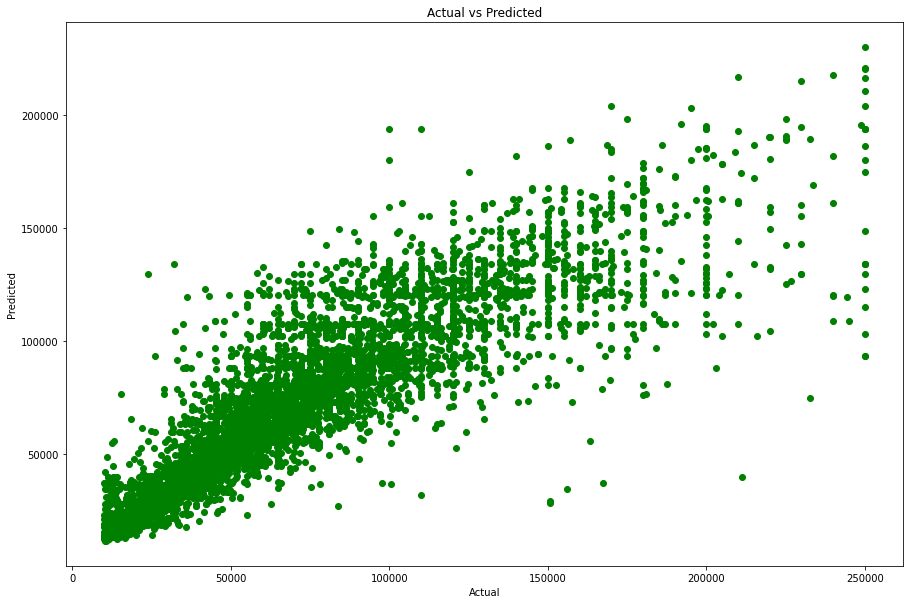

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
plt.scatter(Y_test,Y_pred_test, color='green')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')

Accuracy on train and test data using Random Forest Regressor Algorithm

In [ ]:
from sklearn.metrics import r2_score
r2_score(Y_train, Y_pred_train)

0.7118806814193812

In [ ]:
error = np.sqrt(mean_squared_error(Y_train, Y_pred_train))
print("${:,.02f}".format(error))

$25,299.15


In [ ]:
from sklearn.metrics import r2_score
r2_score(Y_test, Y_pred_test)


0.7382210336634392

In [ ]:
error = np.sqrt(mean_squared_error(Y_test, Y_pred_test))
print("${:,.02f}".format(error))

$23,435.77


Testing Model with some input data

In [ ]:
X = np.array([["United States", 'Master’s degree', 15,35]])
print(X)

[['United States' 'Master’s degree' '15' '35']]


In [ ]:
X[:, 0] = le_country.transform(X[:, 0])
X[:, 1] = le_education.transform(X[:, 1])
X = X.astype(float)
print(X)

[[13.  2. 15. 35.]]


In [ ]:
y_pred = dec_tree_reg.predict(X)
print(y_pred)

[120000.]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  "X does not have valid feature names, but"


Extracting the build model as pki file

In [ ]:
import pickle

In [ ]:
data = {"model": dec_tree_reg1, "le_country": le_country, "le_education": le_education}
with open('saved_steps.pkl', 'wb') as file:
    pickle.dump(data, file)

In [ ]:
with open('saved_steps.pkl', 'rb') as file:
    data = pickle.load(file)

In [ ]:
regressor_loaded = data["model"]
le_country = data["le_country"]
le_education = data["le_education"]

In [ ]:
y_pred = regressor_loaded.predict(X)
print(y_pred)

[145000.]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  "X does not have valid feature names, but"
